# LTFS EDA

## Импорты и загрузка датасета

In [1]:
import re
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(15, 7)})

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Collab
train_df = pd.read_csv("https://raw.githubusercontent.com/blnglishPlease/LCSM/main/LTFS/data/train.csv")
# test_df = pd.read_csv("https://raw.githubusercontent.com/blnglishPlease/LCSM/main/LTFS/data/test.csv")
data_dict = pd.read_excel("https://github.com/blnglishPlease/LCSM/blob/main/LTFS/data/data_dict.xlsx?raw=true")

# Local machine
# train_df = pd.read_csv("data/train.csv")
# test_df = pd.read_csv("data/test.csv")
# data_dict = pd.read_excel("data/data_dict.xlsx")

## Функции визуализации

Функция для визуализации нормированного распределения по классам

In [3]:
def draw_norm(feature, title):
  norm = (df[feature].value_counts(normalize=True).mul(100).rename('percent').reset_index())

  fig = plt.figure(figsize=(12, 7))
  sns.set_style('whitegrid')
  ax = sns.barplot(
      x='index', 
      y = 'percent', 
      data=norm, 
      palette="muted")

  for p in ax.patches:
    percentage = f'{p.get_height():.1f}'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=14)

  plt.title(title, fontsize=20)
  plt.xlabel(title, fontsize=14)
  plt.ylabel('Percents', fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.show()

In [4]:
def draw_bar(feature, rot=0):
  norm = (df.groupby(['loan_default'])[feature].value_counts(normalize=True).mul(100).rename('percent').reset_index().sort_values(feature))
  fig = plt.figure(figsize=(15, 7))
  sns.set_style('whitegrid')

  ax = sns.barplot(
      x=feature, 
      y = 'percent', 
      data=norm,
      hue='loan_default', 
      palette="muted")

  for p in ax.patches:
    percentage = f'{p.get_height():.1f}'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10)

  plt.title(feature, fontsize=20)
  plt.xlabel(feature, fontsize=14)
  plt.ylabel('Percents', fontsize=14)
  plt.xticks(fontsize=14, rotation=rot)
  plt.yticks(fontsize=14)
  plt.show()

In [5]:
def draw_kde(feature, hue, aspect=3, log_scale=None):
  ax = sns.displot(
      data=df,
      x=feature, 
      hue=hue,
      log_scale=log_scale,
      kind='kde',
      common_norm=False,
      height=7,
      aspect=aspect,
      palette="muted"
  )
  plt.title('Density of ' + feature, fontsize=20)
  plt.xlabel(feature, fontsize=14)
  plt.ylabel('Density', fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.show()

In [6]:
def draw_boxplot(x, y, hue, orient='v'):
  # fig = plt.figure(figsize=(15, 7))
  sns.set_style('whitegrid')
  ax = sns.boxplot(
      data=df,
      x=x, 
      y=y, 
      hue=hue,
      orient=orient,
      palette="muted"
  )
  plt.title(x + '-' + y, fontsize=20)
  plt.xlabel(x, fontsize=14)
  plt.ylabel(y, fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.show()

## Основные характеристики

In [7]:
train_df.shape

(233154, 41)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

**Note:**
Есть пропуски только в `Employment.Type`

Расшифровка значений признаков

In [9]:
sample = pd.DataFrame(train_df.sample(5).T).reset_index()
sample.rename(columns = {'index':'Variable Name'}, inplace=True)
sample_desc = data_dict[['Variable Name','Description_ru']].merge(sample, how='left', on='Variable Name')

In [10]:
sample_desc

,Variable Name,Description_ru,173683,80361,153006,21341,5053
0,UniqueID,ID заемщика,559018,426439,564810,540058,632235
1,loan_default,Просрочка первого ежемесячного платежа,0,0,1,1,0
2,disbursed_amount,Сумма выданного кредита,52503,44849,55763,65382,67882
3,asset_cost,Стоимость авто,68636,69936,65640,90400,113068
4,ltv,Отношение суммы кредита к стоимости авто,78.97,65.77,86.84,74.67,61.91
5,branch_id,"ID филиала, где выдали займ",202,7,97,48,1
6,supplier_id,ID дилера выдавшего займ,23892,21758,15777,23331,23793
7,manufacturer_id,ID марки авто,86,45,45,48,51
8,Current_pincode_ID,"Почтовый индекс клиента, где был подан запрос ...",774,5816,1109,6357,4950
9,Date.of.Birth,Дата рождения заемщика,08-02-92,10-10-98,01-01-88,10-03-93,01-01-88


In [11]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


**Note:**
*   Видим аномальные отрицательные значения в полях `PRI.CURRENT.BALANCE`, `SEC.CURRENT.BALANCE`
*   Флаг `MobileNo_Avl_Flag` для всех записей равен 1

## Первичная обработка



*   Удаление `UniqueID` и `MobileNo_Avl_Flag`
*   Удаление категориальных признаков большой мощности(`branch_id`, `supplier_id`, `Current_pincode_ID`, `Employee_code_ID`)
*   Заполнение пропусков в `Employment.Type` и кодирование атрибута
*   Приведение дат `Date.of.Birth` и `DisbursalDate` к формату `datetime`
*   Вычисление `Age` возраста заемщика и удаление поля `Date.of.Birth`
*   Конвертация значений полей `CREDIT.HISTORY.LENGTH` и `AVERAGE.ACCT.AGE` в число месяцев
*   Заполнение нулями полей `PRI.CURRENT.BALANCE` и `SEC.CURRENT.BALANCE` с отрицательными значениями

In [12]:
df = train_df.copy()
df.drop('UniqueID', axis=1, inplace=True) # Уникальный идентификатор не представляет интереса, так как не влияет на таргет
df.drop('MobileNo_Avl_Flag', axis=1, inplace=True) # Аналогично не влияет признак с постоянным значением

Избавимся от категориальных признаков слишком большой мощности



In [13]:
id_features = ['branch_id', 'supplier_id', \
               'Current_pincode_ID', 'Employee_code_ID']

df = df.drop(id_features, axis=1)

### Устранение пропусков

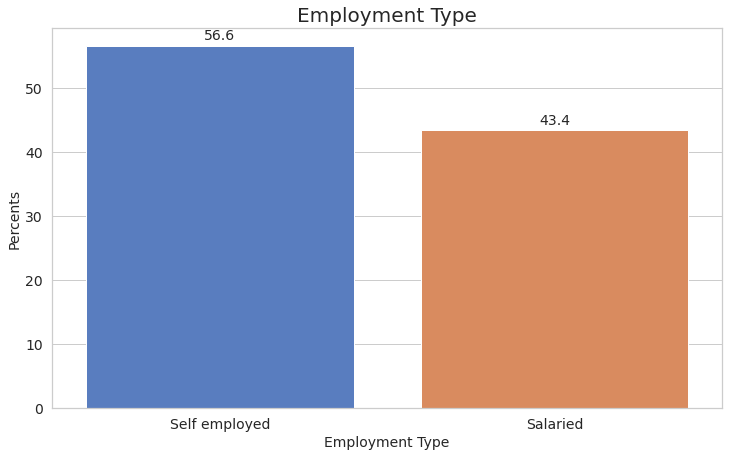

In [14]:
draw_norm('Employment.Type', 'Employment Type')

Заполним пропуски в поле "Тип занятости" значением 'Self employed'

In [15]:
df['Employment.Type'] = train_df['Employment.Type'].fillna('Self employed')

И сразу закодируем

In [16]:
df['is_salaried'] = pd.get_dummies(data=df['Employment.Type'])['Salaried']
df = df.drop(['Employment.Type'], axis=1)

### Работа с датами

Конвертируем дату рождения и дату выдачи из object в datetime

In [17]:
df['Date.of.Birth'] = pd.to_datetime(train_df['Date.of.Birth'], format='%d-%m-%y')
df['DisbursalDate'] = pd.to_datetime(train_df['DisbursalDate'], format='%d-%m-%y')
df[['Date.of.Birth', 'DisbursalDate']].head(10)

,Date.of.Birth,DisbursalDate
0,1984-01-01,2018-08-03
1,1985-07-31,2018-09-26
2,1985-08-24,2018-08-01
3,1993-12-30,2018-10-26
4,1977-12-09,2018-09-26
5,1990-09-08,2018-09-19
6,1988-06-01,2018-09-23
7,1989-10-04,2018-09-16
8,1991-11-15,2018-09-05
9,2068-06-01,2018-09-16


Видно, что пандочки наши живут по китайскому календарю, согласно которому 2068 год не является будущим...

Найдем возраст заемщика на момент выдачи кредита

In [18]:
# Корректировки неправильно распознанных дат из-за двух символов для обозначения года
future = df['Date.of.Birth'] > max(df['DisbursalDate'])
df.loc[future, 'Date.of.Birth'] -= np.timedelta64(100, 'Y')

df['Age'] = ((df['DisbursalDate'] - df['Date.of.Birth']) / np.timedelta64(1, 'Y')).apply(lambda x: int(x))
df = df.drop(['Date.of.Birth'], axis=1)

Для полей "Длина кредитной истории" и "Средний срок кредита" из '_yrs_mon' находим количество месяцев

In [19]:
def get_month_cnt(string):
    digits = re.findall(r'(\d+)', string=string)
    yrs = int(digits[0])
    mon = int(digits[1])
    return (yrs * 12) + mon

In [20]:
df['CREDIT.HISTORY.LENGTH'] = train_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: get_month_cnt(x))
df['AVERAGE.ACCT.AGE'] = train_df['AVERAGE.ACCT.AGE'].apply(lambda x: get_month_cnt(x))
df[['CREDIT.HISTORY.LENGTH', 'AVERAGE.ACCT.AGE']].head(10)

,CREDIT.HISTORY.LENGTH,AVERAGE.ACCT.AGE
0,0,0
1,23,23
2,0,0
3,15,8
4,0,0
5,24,21
6,0,0
7,2,2
8,56,56
9,19,19


### Отрицательные остатки

In [21]:
len(df[(df['PRI.CURRENT.BALANCE'] < 0) | (df['SEC.CURRENT.BALANCE'] < 0)])

509

In [22]:
cur_bal_neg = df[(df['PRI.CURRENT.BALANCE'] < 0) | (df['SEC.CURRENT.BALANCE'] < 0)]
cur_bal_neg.head()

,disbursed_amount,asset_cost,ltv,manufacturer_id,DisbursalDate,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,is_salaried,Age
8,53713,61973,89.56,45,2018-09-05,6,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,56,56,1,0,0,26
434,48599,66245,75.48,45,2018-10-29,6,1,0,0,0,0,630,H-Medium Risk,1,1,0,-367,0,0,0,0,0,0,0,0,0,0,0,0,48,48,0,0,1,22
810,44909,75001,62.67,45,2018-09-24,3,1,0,0,0,0,532,J-High Risk,1,1,0,-60,15000,15000,0,0,0,0,0,0,0,0,0,0,80,80,0,0,1,35
906,50303,71762,71.07,45,2018-10-30,5,1,0,0,0,0,671,F-Low Risk,1,1,0,-737,1015,1015,0,0,0,0,0,0,0,0,0,0,48,48,0,0,0,32
1289,47845,60281,81.29,45,2018-08-30,5,1,0,0,0,0,300,M-Very High Risk,9,4,1,-19342,61029,61029,0,0,0,0,0,0,3264,0,2,0,21,69,0,0,0,36


In [23]:
cur_bal_neg.sort_values(by='PRI.CURRENT.BALANCE').head(10)

,disbursed_amount,asset_cost,ltv,manufacturer_id,DisbursalDate,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,is_salaried,Age
35750,69317,83540,84.99,86,2018-10-26,8,1,0,1,0,0,698,E-Low Risk,37,13,0,-6678296,9419732,9500204,0,0,0,0,0,0,1113468,0,7,2,26,158,0,0,0,36
51857,50553,70166,74.11,86,2018-08-28,14,1,0,0,0,0,712,D-Very Low Risk,2,2,0,-2018309,2040000,2040000,2,2,0,4588,4588,4588,280781,0,3,0,2,8,0,1,0,35
125508,59259,68029,88.20,86,2018-09-21,8,1,0,0,0,0,451,K-High Risk,10,6,1,-1738415,3893000,3893000,2,0,0,0,0,0,720756,0,1,1,17,66,0,0,0,46
145411,53803,65750,83.84,45,2018-10-26,8,1,0,0,0,0,721,D-Very Low Risk,38,11,0,-1408314,2567000,2567000,0,0,0,0,0,0,2288608,0,3,0,12,62,0,0,0,38
37728,42394,66193,64.96,86,2018-09-24,4,1,0,0,0,0,626,H-Medium Risk,22,7,0,-1306449,3705000,3705000,0,0,0,0,0,0,1076804,0,1,1,14,69,0,0,0,52
205049,57259,68065,86.68,86,2018-08-29,4,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,1,-1178242,1220000,1220000,0,0,0,0,0,0,0,0,0,0,10,10,0,0,0,52
209283,60322,68875,89.84,45,2018-08-13,8,1,0,0,0,0,722,D-Very Low Risk,39,4,0,-1108114,1241000,1241000,0,0,0,0,0,0,135256,0,3,0,11,36,0,1,0,42
155567,42972,56070,80.26,45,2018-09-25,8,1,0,0,0,0,698,E-Low Risk,12,3,0,-931644,990000,990000,0,0,0,0,0,0,546542,0,1,0,9,14,0,0,0,49
213449,72223,86600,84.99,86,2018-08-14,8,1,0,0,0,0,300,M-Very High Risk,11,7,4,-763599,2264000,2264000,0,0,0,0,0,0,37973,0,1,1,34,119,0,1,0,44
160557,62800,81366,79.03,120,2018-08-06,8,1,0,0,0,0,853,A-Very Low Risk,9,7,0,-754060,4296139,4609981,0,0,0,0,0,0,48236,0,0,0,72,192,0,0,0,54


In [24]:
cur_bal_neg.sort_values(by='SEC.CURRENT.BALANCE').head(10)

,disbursed_amount,asset_cost,ltv,manufacturer_id,DisbursalDate,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,is_salaried,Age
138866,42894,68888,65.32,120,2018-08-17,9,1,0,0,0,0,584,I-Medium Risk,8,7,0,199901,332859,332859,4,4,0,-574647,780528,780119,0,0,1,0,26,124,0,0,0,32
19286,69069,89921,77.73,86,2018-09-30,14,1,0,0,0,0,726,D-Very Low Risk,10,3,0,37834,84290,84290,1,1,0,-239782,31000,30985,6286,0,2,1,10,23,0,0,1,38
195382,36039,64000,57.97,48,2018-09-14,8,0,0,1,0,0,300,M-Very High Risk,7,2,1,177291,171000,171000,7,3,0,-155527,146000,146000,0,1167,2,1,14,36,0,0,0,44
25555,61447,70577,89.26,86,2018-08-07,4,1,0,0,0,0,738,C-Very Low Risk,1,1,0,291256,343000,343000,2,2,2,-117138,600000,600000,0,13806,0,0,44,63,0,0,0,59
174114,62213,73781,85.39,86,2018-09-08,9,1,0,0,0,0,726,D-Very Low Risk,13,2,0,29360,30400,30400,8,2,0,-31290,119000,119000,9093,0,2,0,12,35,2,0,0,44
193831,37864,76677,53.47,51,2018-08-31,9,1,0,0,0,0,626,H-Medium Risk,2,2,0,688996,825000,825000,2,2,0,-20000,56096,56096,7429,0,0,0,42,97,0,0,1,34
232348,53094,64467,84.99,86,2018-08-30,6,1,0,0,0,0,481,K-High Risk,29,3,2,12520,89315,89315,1,1,0,-9625,52000,52000,0,2665,0,0,11,58,1,1,0,28
124864,46849,75360,63.69,51,2018-09-14,8,1,0,0,0,0,300,M-Very High Risk,7,3,1,261324,238000,238000,3,2,0,-8606,216111,216111,90900,0,1,1,29,172,0,0,1,54
158841,46369,58574,83.65,51,2018-08-11,1,1,0,0,0,0,684,E-Low Risk,15,9,0,133909,261883,217029,2,2,0,-7730,44995,44995,10434,0,4,0,11,69,0,0,0,30
55562,67569,117228,58.86,48,2018-09-21,6,1,0,0,0,0,730,D-Very Low Risk,8,5,1,246688,1068000,1084510,2,1,0,-7370,56000,40560,0,0,0,3,57,160,0,0,0,38


Возможно это какие то корректировки(косяки) на стороне БКИ. Заменим отрицательные значения нулями

In [25]:
df['PRI.CURRENT.BALANCE'] = df['PRI.CURRENT.BALANCE'].apply(lambda x: max(x, 0))
df['SEC.CURRENT.BALANCE'] = df['SEC.CURRENT.BALANCE'].apply(lambda x: max(x, 0))

**Note:** Есть записи, у которых одобренная сумма(PRI либо SEC) меньше выданной

In [26]:
len(df[(df['PRI.SANCTIONED.AMOUNT'] < df['PRI.DISBURSED.AMOUNT']) | (df['SEC.SANCTIONED.AMOUNT'] < df['SEC.DISBURSED.AMOUNT'])])

4429

## Анализ

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Aadhar_flag,233154.0,0.840320,3.663097e-01,0.00,1.00,1.0,1.00,1.000000e+00
PAN_flag,233154.0,0.075577,2.643201e-01,0.00,0.00,0.0,0.00,1.000000e+00
VoterID_flag,233154.0,0.144943,3.520439e-01,0.00,0.00,0.0,0.00,1.000000e+00
Driving_flag,233154.0,0.023242,1.506720e-01,0.00,0.00,0.0,0.00,1.000000e+00
Passport_flag,233154.0,0.002127,4.607421e-02,0.00,0.00,0.0,0.00,1.000000e+00


### Таргет

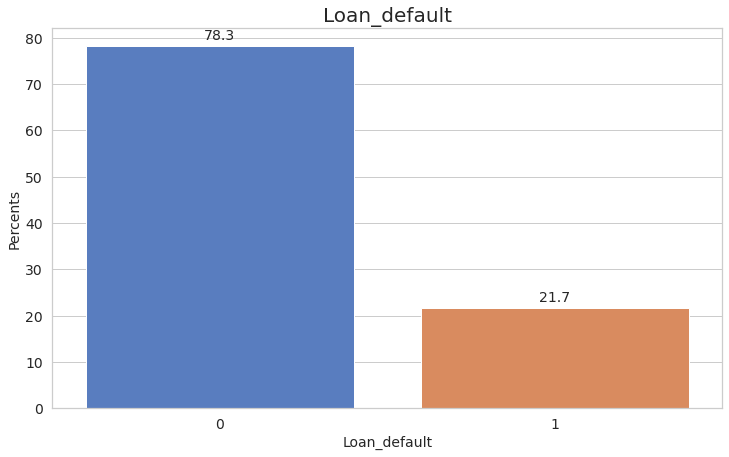

In [28]:
draw_norm('loan_default', 'Loan_default')

**Note:**
Присутствует сильный дисбаланс классов, запомним это для этапа обучения модели

### Категориальные признаки

Нам интересны дискретные числовые признаки, которые имеют влияние на предсказание(т.е. анонимизированные данные по категориям и флаги) и строковые(спойлер: такой остался один признак, который очевидно коррелирован со скором БКИ)


In [29]:
df.nunique()

disbursed_amount                       24565
asset_cost                             46252
ltv                                     6579
manufacturer_id                           11
DisbursalDate                             84
State_ID                                  22
Aadhar_flag                                2
PAN_flag                                   2
VoterID_flag                               2
Driving_flag                               2
Passport_flag                              2
PERFORM_CNS.SCORE                        573
PERFORM_CNS.SCORE.DESCRIPTION             20
PRI.NO.OF.ACCTS                          108
PRI.ACTIVE.ACCTS                          40
PRI.OVERDUE.ACCTS                         22
PRI.CURRENT.BALANCE                    71001
PRI.SANCTIONED.AMOUNT                  44390
PRI.DISBURSED.AMOUNT                   47909
SEC.NO.OF.ACCTS                           37
SEC.ACTIVE.ACCTS                          23
SEC.OVERDUE.ACCTS                          9
SEC.CURREN

In [30]:
discr_features = [feature for feature in df.columns if df[feature].nunique() < 25 \
                  and 'PRI.' not in feature and 'SEC.' not in feature\
                  and feature != 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'\
                  and feature != 'loan_default']
print(discr_features)
print(f"Всего дискретных числовых признаков: {len(discr_features)}")

['manufacturer_id', 'State_ID', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE.DESCRIPTION', 'is_salaried']
Всего дискретных числовых признаков: 9


In [31]:
df[discr_features].head()

,manufacturer_id,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE.DESCRIPTION,is_salaried
0,45,6,1,0,0,0,0,No Bureau History Available,1
1,45,6,1,0,0,0,0,I-Medium Risk,0
2,45,6,1,0,0,0,0,No Bureau History Available,0
3,45,6,1,0,0,0,0,L-Very High Risk,0
4,45,6,1,0,0,0,0,No Bureau History Available,0


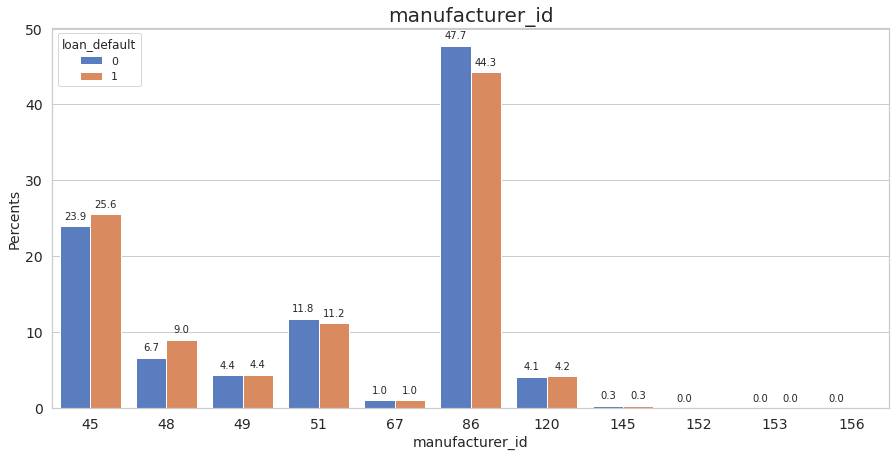

In [32]:
draw_bar('manufacturer_id')

**Note:**
Кредиты на авто производителей 45, 48 с большей вероятностью не будут одобрены. Для производителя 86 видим обратное. Возможно это связано с разной средней стоимостью машин разных марок, либо с психологическим портретом водителя авто какой либо марки 

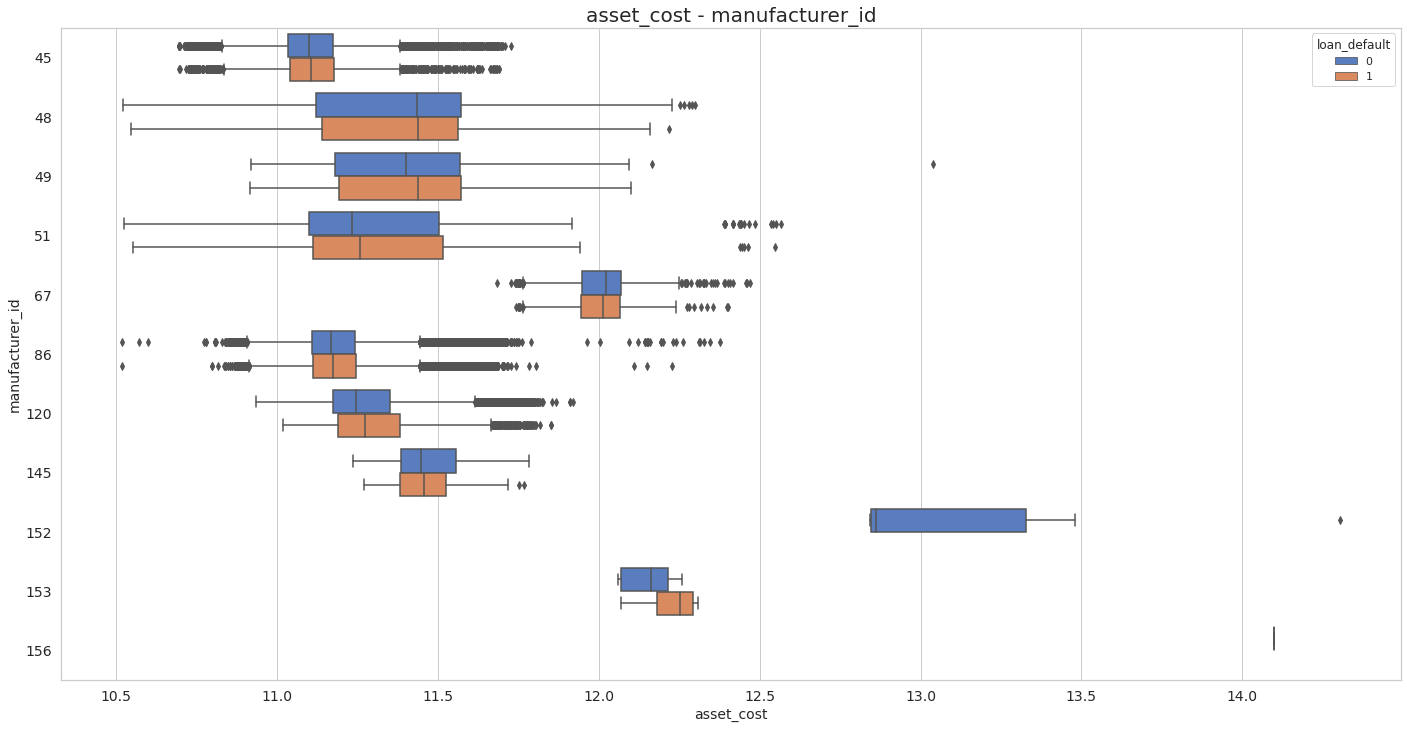

In [33]:
tmp = df[['asset_cost', 'manufacturer_id', 'loan_default']].copy()
tmp['asset_cost'] = tmp['asset_cost'].apply(lambda x: np.log(x))
fig = plt.figure(figsize=(24, 12))
sns.set_style('whitegrid')
ax = sns.boxplot(
    data=tmp, 
    x='asset_cost',
    y='manufacturer_id', 
    orient='h',
    hue='loan_default',
    palette="muted"
)
plt.title('asset_cost - manufacturer_id', fontsize=20)
plt.ylabel('manufacturer_id', fontsize=14)
plt.xlabel('asset_cost', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Первое предположение не подтвердилось

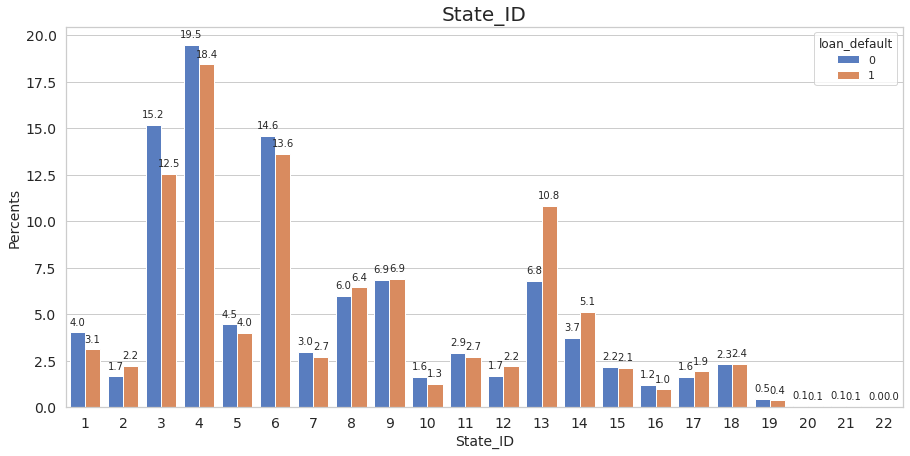

In [34]:
draw_bar('State_ID')

**Note:**
В штатах 1, 3, 4 и 6 процент дефолта заметно меньше, чем процент успешных выплат. В штатах 13 и 14 наоборот. Это может быть связано с разной экономической ситуацией в каждом штате 

In [35]:
train_df.groupby('PERFORM_CNS.SCORE.DESCRIPTION')['PERFORM_CNS.SCORE'].describe().sort_values(by='min')

,count,mean,std,min,25%,50%,75%,max
PERFORM_CNS.SCORE.DESCRIPTION,,,,,,,,
No Bureau History Available,116950.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
Not Scored: More than 50 active Accounts found,3.0,11.000000,0.000000,11.0,11.00,11.0,11.0,11.0
Not Scored: Only a Guarantor,976.0,14.000000,0.000000,14.0,14.00,14.0,14.0,14.0
Not Scored: Sufficient History Not Available,3765.0,15.000000,0.000000,15.0,15.00,15.0,15.0,15.0
Not Scored: No Activity seen on the customer (Inactive),2885.0,16.000000,0.000000,16.0,16.00,16.0,16.0,16.0
Not Scored: Not Enough Info available on the customer,3672.0,17.000000,0.000000,17.0,17.00,17.0,17.0,17.0
Not Scored: No Updates available in last 36 months,1534.0,18.000000,0.000000,18.0,18.00,18.0,18.0,18.0
M-Very High Risk,8776.0,300.000000,0.000000,300.0,300.00,300.0,300.0,300.0
L-Very High Risk,1134.0,326.601411,15.135395,301.0,312.25,327.0,340.0,350.0


Видим взаимооднозначное отображение рейтинга БКИ

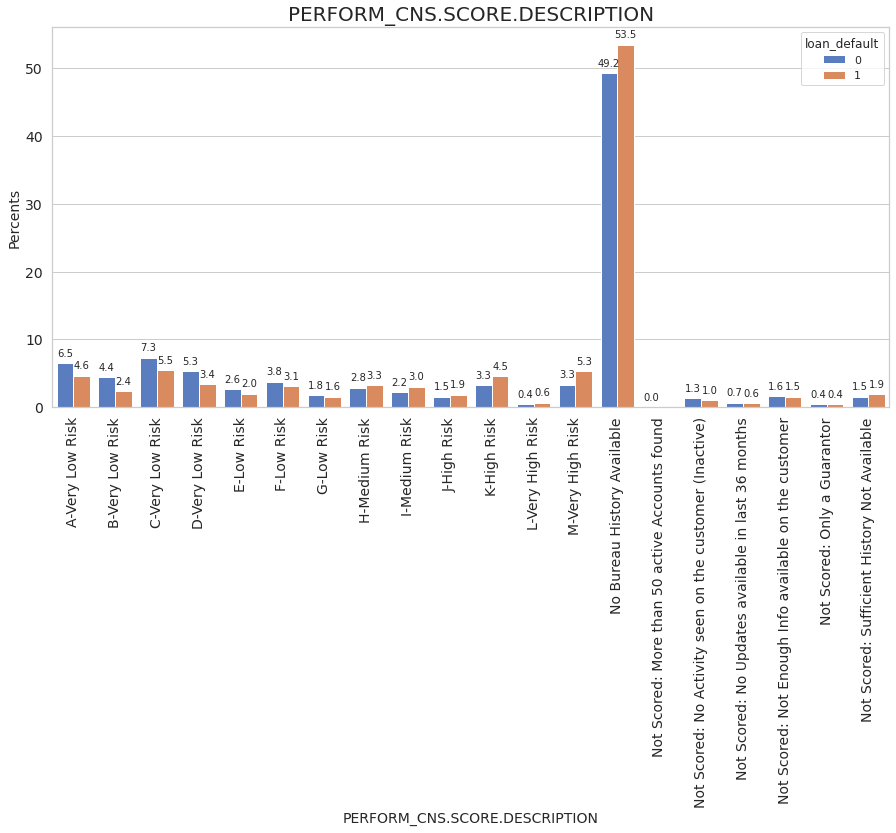

In [36]:
draw_bar('PERFORM_CNS.SCORE.DESCRIPTION', rot=90)

**Note:**
Видна вполне очевидная зависимость вероятности дефолта от кода БКИ. Наибольший вклад в положительный прогноз дефолта вносит отсутствие кредитной истории 

Закодируем значения `PERFORM_CNS.SCORE.DESCRIPTION` в столбце `risk`

In [37]:
def risk_map(string):
  if('Very Low' in string):
    risk_category = 4
  elif('Low' in string):
    risk_category = 3
  elif('Medium' in string):
    risk_category = 2
  elif('High' in string):
    risk_category = 1
  elif('Very High' in string):
    risk_category = 0
  else:
    risk_category = -1
  return risk_category

In [38]:
df['risk'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: risk_map(x))
df.drop('PERFORM_CNS.SCORE.DESCRIPTION', axis=1, inplace=True)

Для заемщиков без кредитной истории занулим значение кредитного рейтинга

In [39]:
df['PERFORM_CNS.SCORE'] = df['PERFORM_CNS.SCORE'] * (df['risk'] != -1).astype(int)

### Числовые признаки

In [40]:
num_features = [feature for feature in df.select_dtypes(include=['int64', 'float64', 'uint8']).columns\
                if feature not in discr_features]
print(num_features)
print(f"Всего числовых признаков: {len(num_features)}")

['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default', 'Age', 'risk']
Всего числовых признаков: 26


In [41]:
df[num_features].head()

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age,risk
0,50578,58400,89.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,-1
1,47145,65550,73.23,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,33,2
2,53278,61360,89.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,-1
3,57513,66113,88.48,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,24,1
4,52378,60300,88.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,40,-1


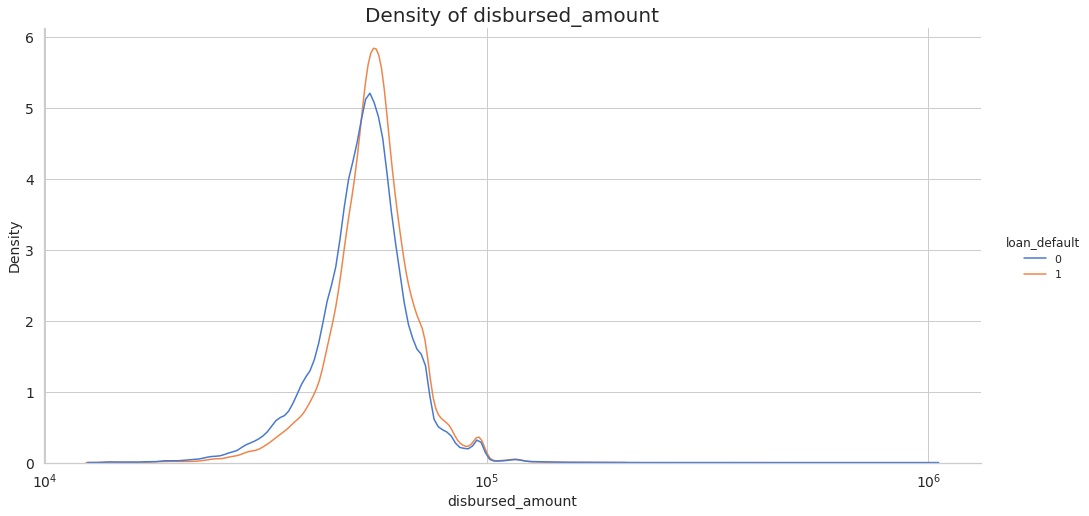

In [42]:
draw_kde('disbursed_amount', 'loan_default', 2, True)

In [43]:
df.groupby('loan_default')['disbursed_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,182543.0,53826.471111,13140.699007,13320.0,46369.0,53303.0,59947.0,990572.0
1,50611.0,56270.473869,12150.255527,13369.0,49303.0,55459.0,61947.0,191392.0


**Note:**
Величина займа меньше 50000 положительно влияет на таргет(толкает к 0). Больше 50000 - наоборот

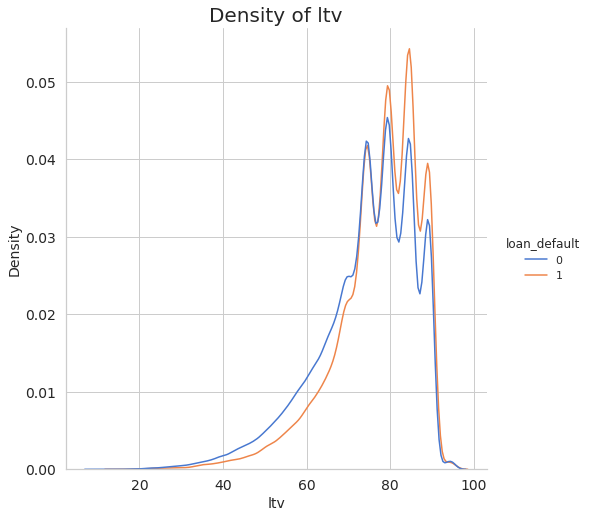

In [44]:
draw_kde('ltv', 'loan_default', 1)

**Note:**
LTV ≃ 80 и выше сильнее влияет на положительное решение о дефолте. При значениях меньше 70 признак вносит больший вклад в отрицательное решение.

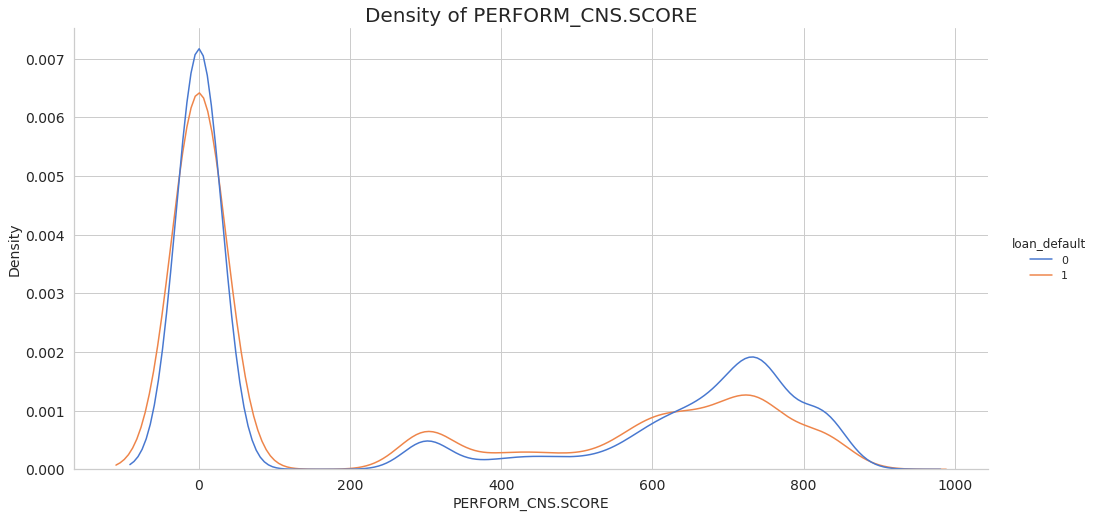

In [45]:
draw_kde('PERFORM_CNS.SCORE', 'loan_default', 2)

**Note:**
Скор меньше 600 сильнее влияет на решение об отказе. Скор больше 600 - наоборот.

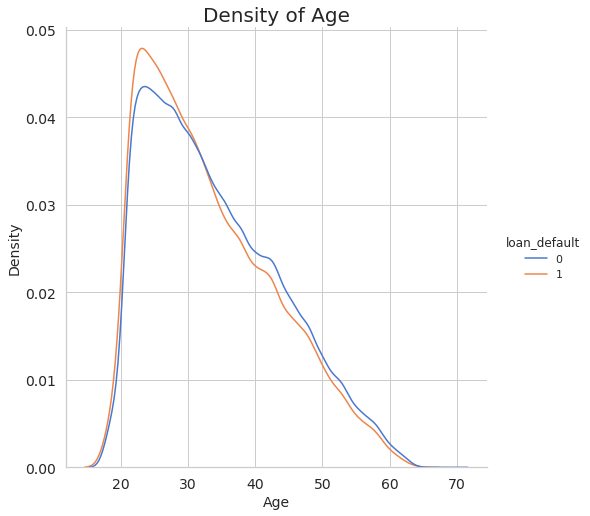

In [46]:
draw_kde('Age', 'loan_default', 1)

In [47]:
df.groupby('loan_default')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,182543.0,34.127230,9.850391,18.0,26.0,32.0,41.0,69.0
1,50611.0,33.257474,9.672853,18.0,25.0,31.0,40.0,64.0


In [48]:
df.groupby('loan_default')['Age'].apply(lambda x: x.value_counts().index[0]).reset_index()

,loan_default,Age
0,0,23
1,1,22


**Note:**
Возраст заемщиков слабо влияет на вероятность дефолта, однако заметим, что возраст менее ~34 лет вносит вклад в решение об отказе

### Корреляционная матрица 

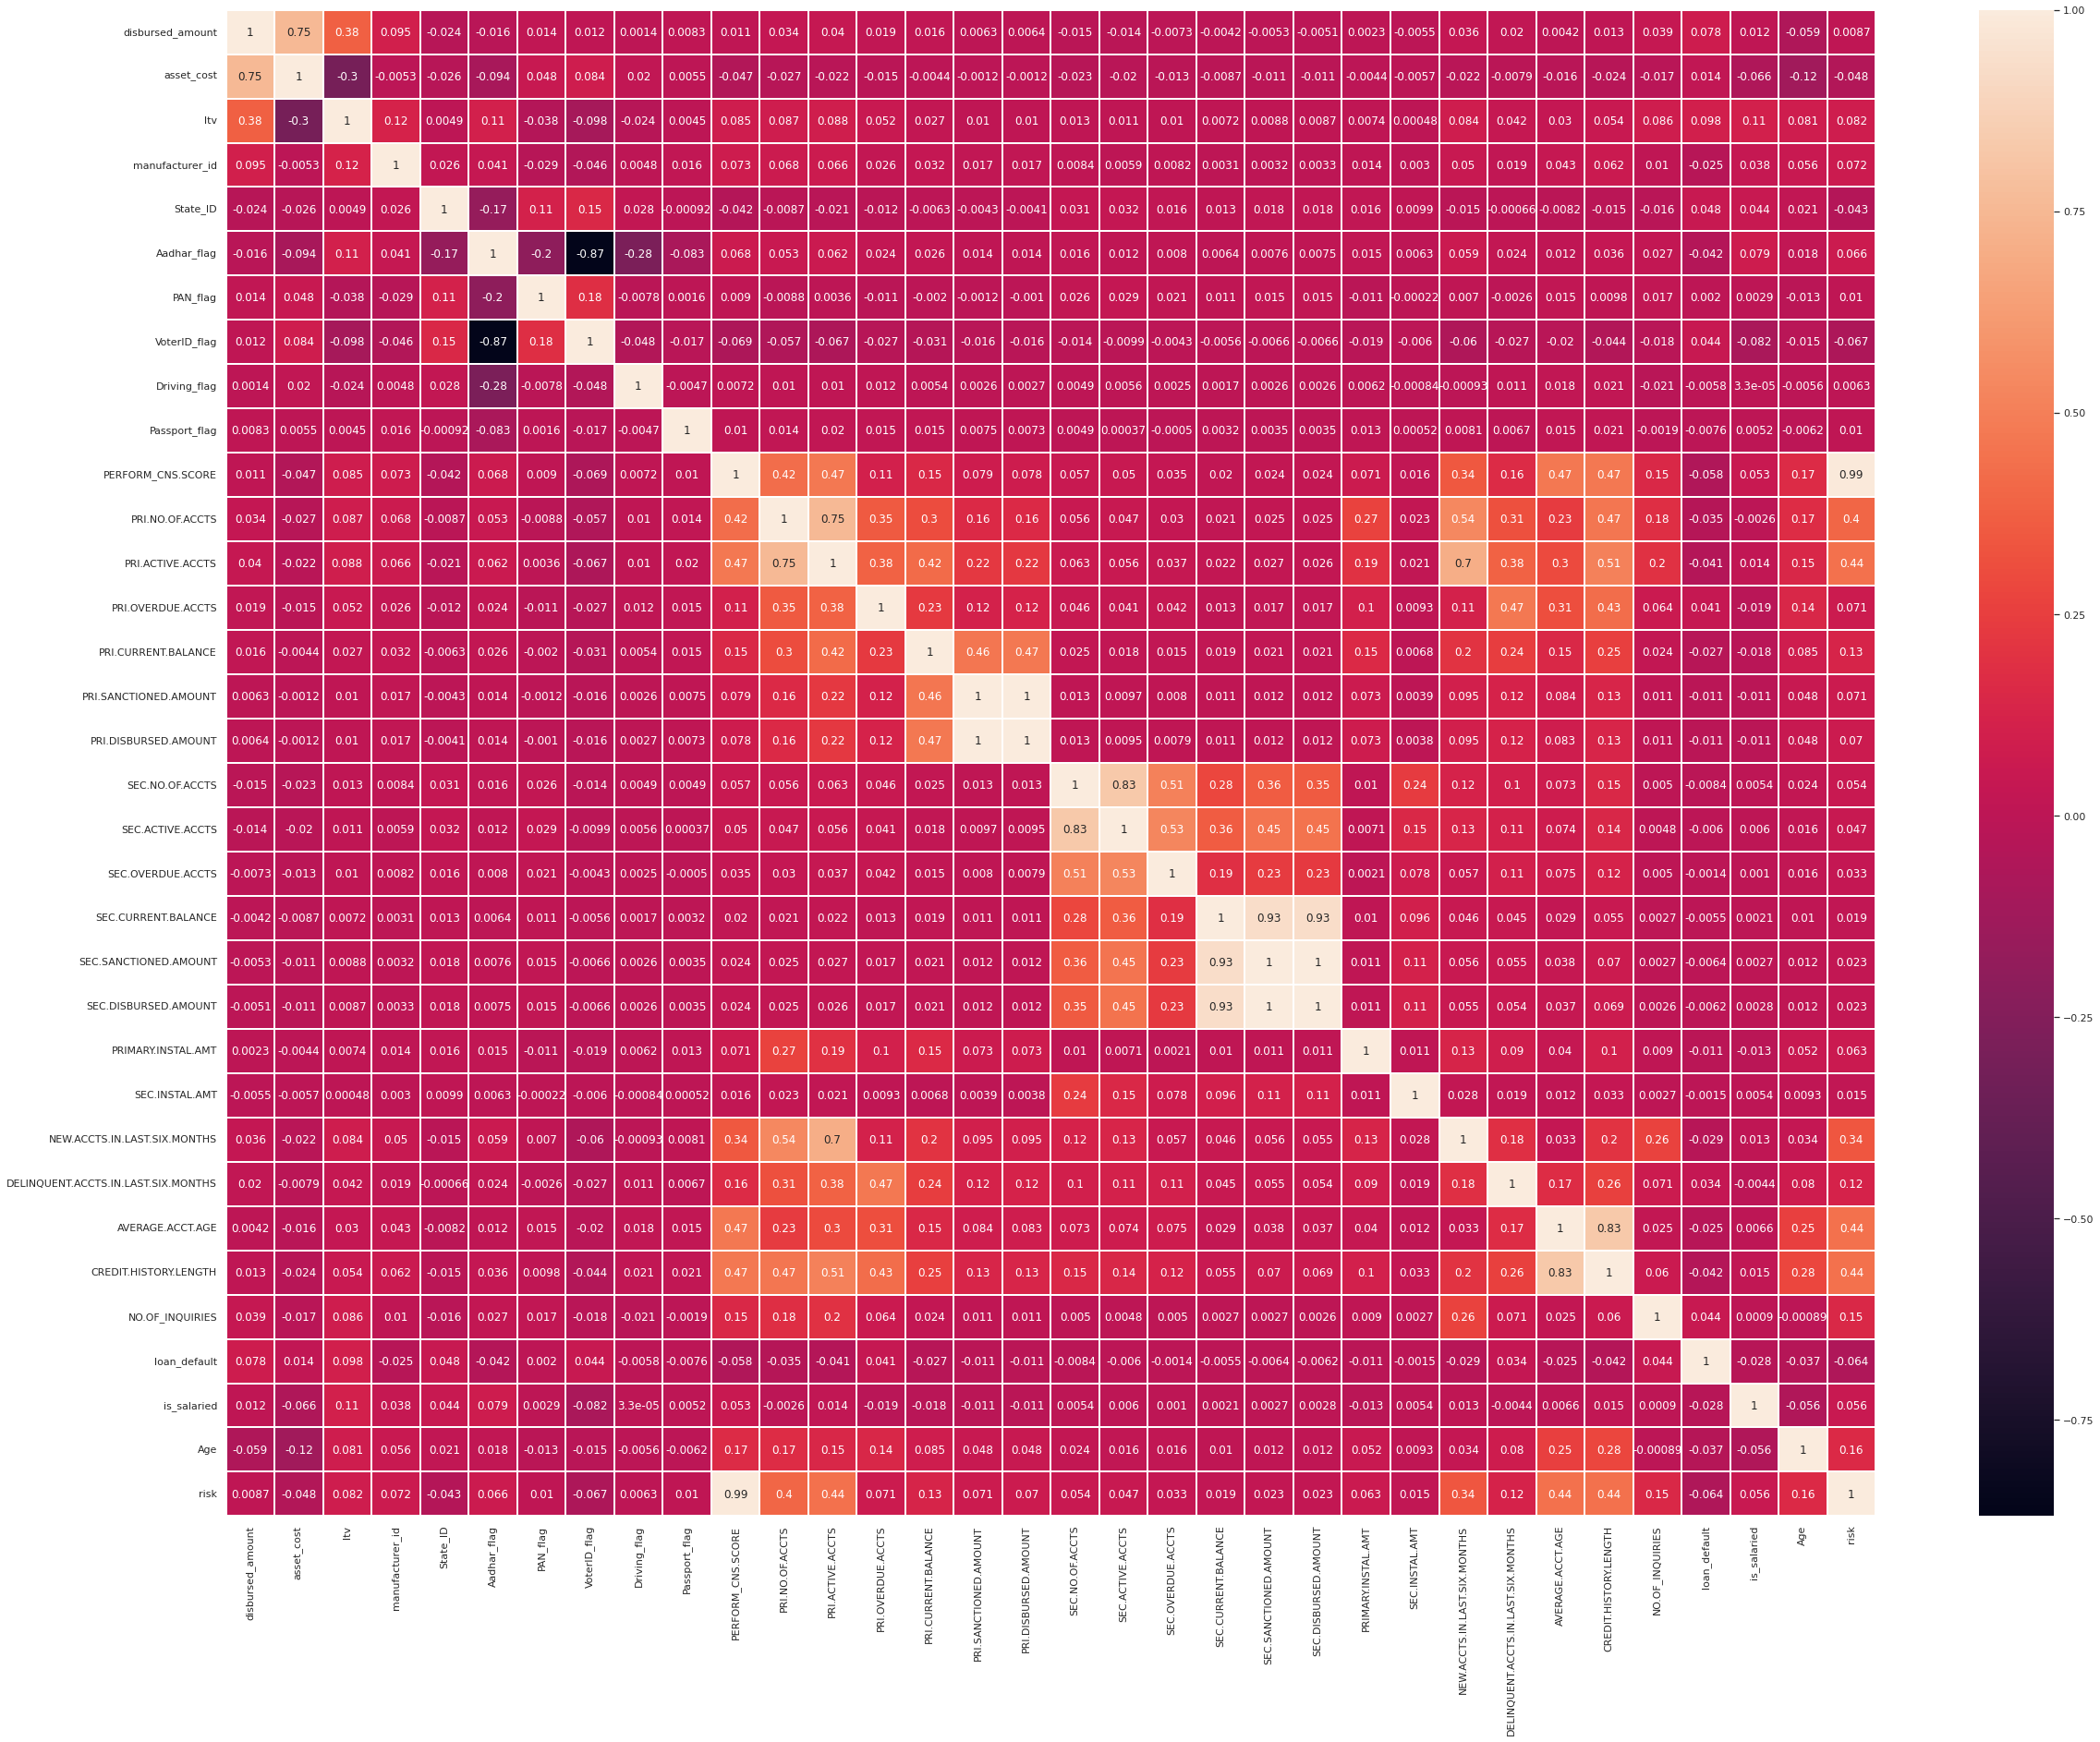

In [49]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),linewidths=0.05,annot=True)
plt.show()

**Note:**
Видим корреляции: 
*  между некоторыми признаками наличия удостоверения личности
*  между возрастом и длинной кредитной истории(+средний срок кредита)
*  между группой признаков кредитов в роли заемщика и группой признаков с обобщенной информацией о кредитах